<a href="https://colab.research.google.com/github/MoriartyKang/DL/blob/main/250528_rnn_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시퀀스 배열로 다루는 순환 신경망(RNN)

## 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기

### 라이브러리 불러오기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

### 데이터셋 불러오기 및 확인

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [3]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8982,) (2246,)
(8982,) (2246,)


In [4]:
category = np.max(y_train) + 1 # 0 ~ 45

print(f"카테고리 : {category}개")
print(f"학습용 뉴스 기사 : {len(X_train)}개")
print(f"테스트용 뉴스 기사 : {len(X_test)}개")
print(X_train[0])
print(f"토큰 개수 ex : {len(X_train[0])}, {len(X_train[1])}, {len(X_train[2])}")

카테고리 : 46개
학습용 뉴스 기사 : 8982개
테스트용 뉴스 기사 : 2246개
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
토큰 개수 ex : 87, 56, 139


### 텍스트 전처리

In [5]:
# Padding 적용
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
print(f"토큰 개수 ex : {len(X_train[0])}, {len(X_train[1])}, {len(X_train[2])}")

토큰 개수 ex : 100, 100, 100


In [6]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [7]:
# One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
len(y_train[0])

46

### 모델 생성

확인문제 1 : 빈칸에 들어갈 값을 적으세요

In [9]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3764 - loss: 2.4836 - val_accuracy: 0.5267 - val_loss: 1.8930
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5112 - loss: 1.8769 - val_accuracy: 0.5543 - val_loss: 1.7343
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5813 - loss: 1.6291 - val_accuracy: 0.5864 - val_loss: 1.6318
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6042 - loss: 1.5311 - val_accuracy: 0.6322 - val_loss: 1.4966
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6529 - loss: 1.3498 - val_accuracy: 0.6572 - val_loss: 1.3613
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6964 - loss: 1.1920 - val_accuracy: 0.6710 - val_loss: 1.2833
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7230 - loss: 1.1134 - val_accuracy: 0.6772 - val_loss: 1.2459
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7416 - loss: 1.0102 - val_acc

### 성능 평가 및 시각화

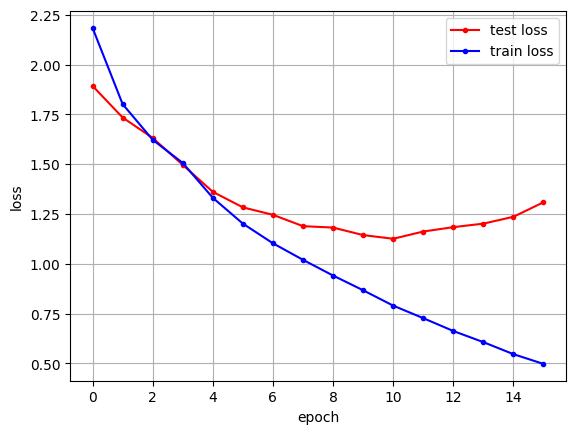

In [10]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='test loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

### 라이브러리 불러오기

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

### 데이터 불러오기 및 확인

In [12]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [14]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))

218 189 141


In [15]:
unique, count = np.unique(y_train, return_counts=True)
print(unique, count)

[0 1] [12500 12500]


In [16]:
unique, count = np.unique(y_test, return_counts=True)
print(unique, count)

[0 1] [12500 12500]


### 텍스트 전처리

In [17]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [18]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))

500 500 500


### 모델 생성

In [19]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.6658 - loss: 0.5580 - val_accuracy: 0.8893 - val_loss: 0.2758
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9089 - loss: 0.2392 - val_accuracy: 0.8723 - val_loss: 0.3034
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9339 - loss: 0.1721 - val_accuracy: 0.8893 - val_loss: 0.2884
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9472 - loss: 0.1469 - val_accuracy: 0.8920 - val_loss: 0.2952
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8858 - loss: 0.3100
Test Accuracy:  0.8881


### 성능 평가 및 시각화

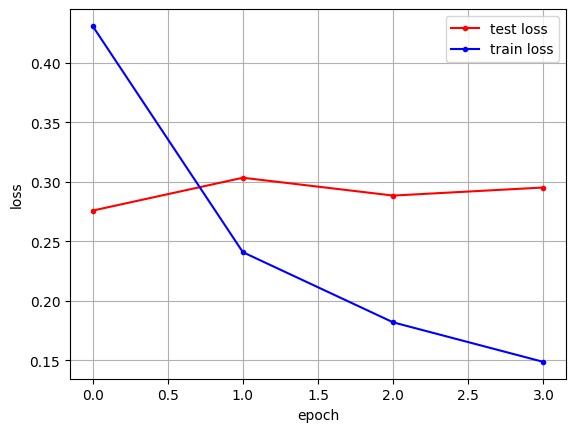

In [21]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='test loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

확인문제 3 : 모델 수정 및 결과 비교
- 과적합이 발생한 이유에 대해 설명하세요
- Embedding Layer의 출력 벡터 수를 50으로 조정 후 결과를 비교해보세요

답:

모델의 백터 크기가 커서 복잡하고 데이터에 일반화 성능이 저하되어 과적합 발생했다 판단함

In [33]:
model = Sequential()
model.add(Embedding(5000, 50))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ ?                           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6857 - loss: 0.5430 - val_accuracy: 0.8754 - val_loss: 0.3045
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9018 - loss: 0.2522 - val_accuracy: 0.8902 - val_loss: 0.2646
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9258 - loss: 0.1929 - val_accuracy: 0.8803 - val_loss: 0.2878
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9403 - loss: 0.1634 - val_accuracy: 0.8917 - val_loss: 0.2680
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9490 - loss: 0.1416 - val_accuracy: 0.8816 - val_loss: 0.3206
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8715 - loss: 0.3498
Test Accuracy:  0.8716


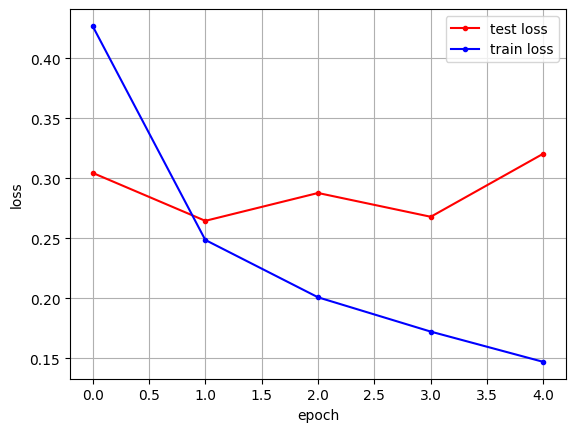

In [35]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='test loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Embedding Layer의 출력 벡터 수를 50변경시 과적합이 줄어든다

## 3. 어텐션을 사용한 신경망

In [22]:
!pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=5fbe43f77664dea432d12e86a763ae2b1fd66a9f80ef2fff0b1b18046949025b
  Stored in directory: /root/.cache/pip/wheels/46/f9/96/709295c836133071c12a300729fed4027757f889c01695feea
Successfully built keras-self-attention


In [23]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import plot_model
from keras_self_attention import SeqSelfAttention

### 모델 생성

In [24]:
att_model = Sequential()
att_model.add(Embedding(5000, 500))
att_model.add(Dropout(0.5))
att_model.add(LSTM(64, return_sequences=True))
att_model.add(SeqSelfAttention(attention_activation='sigmoid'))
att_model.add(Dropout(0.5))
att_model.add(Flatten())
att_model.add(Dense(1))
att_model.add(Activation('sigmoid'))

### 모델 학습

In [25]:
att_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

att_history = att_model.fit(X_train, y_train, batch_size=40, epochs=100,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print(f"Test Accuracy: {att_model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 182ms/step - accuracy: 0.7071 - loss: 0.5070 - val_accuracy: 0.8943 - val_loss: 0.2609
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 181ms/step - accuracy: 0.9207 - loss: 0.2036 - val_accuracy: 0.8928 - val_loss: 0.2599
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 159ms/step - accuracy: 0.9467 - loss: 0.1452 - val_accuracy: 0.8851 - val_loss: 0.3082
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 181ms/step - accuracy: 0.9663 - loss: 0.0954 - val_accuracy: 0.8819 - val_loss: 0.3497
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 179ms/step - accuracy: 0.9774 - loss: 0.0650 - val_accuracy: 0.8766 - val_loss: 0.4013
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.8767 - loss: 0.4016
Test Accuracy:  0.8766


### 성능 평가 및 시각화

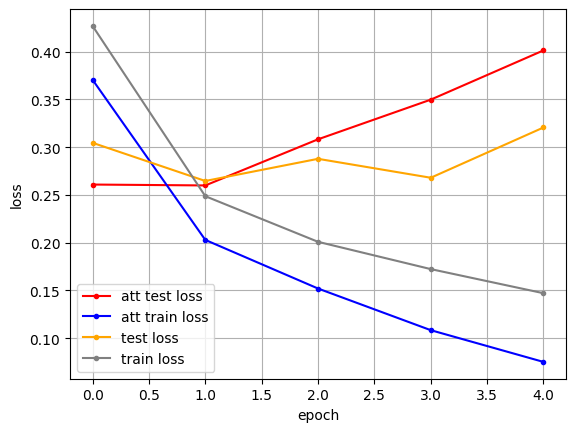

In [36]:
att_y_vloss = att_history.history['val_loss']
att_y_loss = att_history.history['loss']

x_len = np.arange(len(att_y_loss))
plt.plot(x_len, att_y_vloss, marker='.', c="red", label='att test loss')
plt.plot(x_len, att_y_loss, marker='.', c="blue", label='att train loss')
plt.plot(x_len, y_vloss[0:5], marker='.', c="orange", label='test loss')
plt.plot(x_len, y_loss[0:5], marker='.', c="gray", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

확인문제 2 : LSTM + CNN 모델과 어텐션 모델의 결과를 비교하고 이유를 설명하세요

답:

어텐션 모델은 학습 데이터에는 잘 맞지만 검증 손실이 빠르게 증가하는 과적합이 발생하였고,

LSTM + CNN 모델은 안정적인 임베딩을 했을 경우 상대적으로 더 안정적인 학습 곡선을 보이며 일반화 성능이 더 좋다고 판단을 할 수 있다